In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# load file contents
data = pd.read_csv('births.csv')

#day of week
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#see Data tail
data.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [4]:
#before cleaning
data.count()

year      15547
month     15547
day       15067
gender    15547
births    15547
dtype: int64

In [5]:
#cleaning data 

# is a Leap Year
def isLeapYear(year):
    bissextile = False
    if year % 400 == 0: # Si l'année est divisible par 400
        bissextile = True
    elif year % 100 == 0: # Si l'année est divisible par 100
        bissextile = False
    elif year % 4 == 0: # Si l'années est divisible par 4
        bissextile = True

    if bissextile:
        return True
    else:
        return False

# Delete NaN
newData = data.dropna()

# Delete not good date
mask31 = ((newData['month'] == 1) | (newData['month'] == 3) | (newData['month'] == 5) | (newData['month'] == 7) | (newData['month'] == 8) | (newData['month'] == 10)| (newData['month'] == 12)) & (newData['day'] <= 31)
mask30 = ((newData['month'] == 4) | (newData['month'] == 6) | (newData['month'] == 9) | (newData['month'] == 11)) & (newData['day'] <= 30)
mask29 = (newData['month'] == 2) & (newData['day'] <= 29) & (newData['year'].apply(lambda x: isLeapYear(x)) == True)
mask28 = (newData['month'] == 2) & (newData['day'] <= 28) & (newData['year'].apply(lambda x: isLeapYear(x)) == False)

newData = newData[mask31 | mask30 | mask29 | mask28]

# Day to int
newData['day'] = newData['day'].apply(np.int64)

#after cleaning
newData.count()

year      14610
month     14610
day       14610
gender    14610
births    14610
dtype: int64

In [6]:
# create day of week column 
birthday = newData['year'].apply(np.str) + ' ' + newData['month'].apply(np.str)+ ' '+ newData['day'].apply(np.str)
newData['dayofweek'] = birthday.apply(lambda x: datetime.strptime(x, '%Y %m %d').weekday())


In [7]:
newData.tail()

,year,month,day,gender,births,dayofweek
15062,1988,12,29,M,5944,3
15063,1988,12,30,F,5742,4
15064,1988,12,30,M,6095,4
15065,1988,12,31,F,4435,5
15066,1988,12,31,M,4698,5


In [8]:
# the decades
mask1960 = ((newData['year'] >= 1960) & (newData['year'] < 1970))
mask1970 = ((newData['year'] >= 1970) & (newData['year'] < 1980))
mask1980 = ((newData['year'] >= 1980) & (newData['year'] < 1990))

# the decades grouped by dayofweek
births1960 = newData[mask1960].groupby('dayofweek', as_index = False)
births1970 = newData[mask1970].groupby('dayofweek', as_index = False)
births1980 = newData[mask1980].groupby('dayofweek', as_index = False)

# the sum of births for each decade grouped by dayofweek
curve1960 = births1960['births'].sum()
curve1970 = births1970['births'].sum()
curve1980 = births1980['births'].sum()

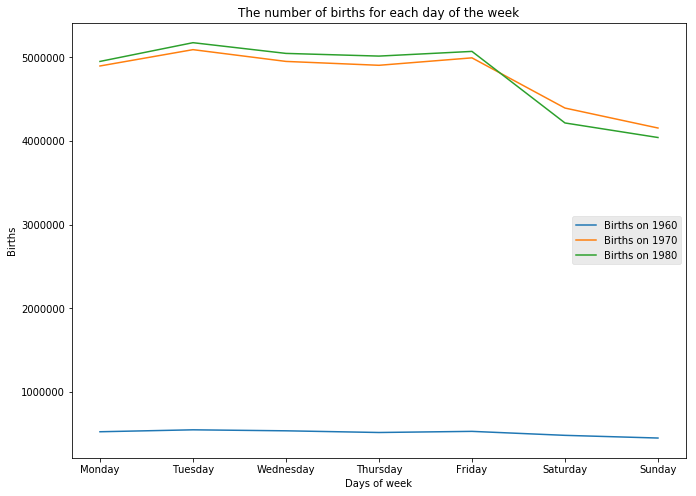

In [9]:
# plote: The number of births for each day of the week
fig = plt.figure(figsize=(11,8))
plt.title("The number of births for each day of the week")
plt.style.use(plt.style.available[5])
plt.plot(week_day,curve1960["births"], label="Births on 1960")
plt.plot(week_day,curve1970["births"], label="Births on 1970")
plt.plot(week_day,curve1980["births"], label="Births on 1980")
plt.legend(loc='center right');
plt.xlabel("Days of week")
plt.ylabel("Births")
plt.show()
